## 실습64: docker로 Rstudio 실행하기(실습실 컴퓨터)

ref: <https://rocker-project.org/>

`-` 다커실행파일 다운로드 

- <https://docs.docker.com/desktop/install/windows-install/>

`-` docker 이미지 다운로드 

**방법1**
```bash
docker pull rocker/rstudio
```

**방법2**

- 사실 잘 몰라요 ㅎㅎ 

`-` 다운받은 이미지 확인하기 

**방법1**
```bash
docker images
```

**방법2**

- GUI

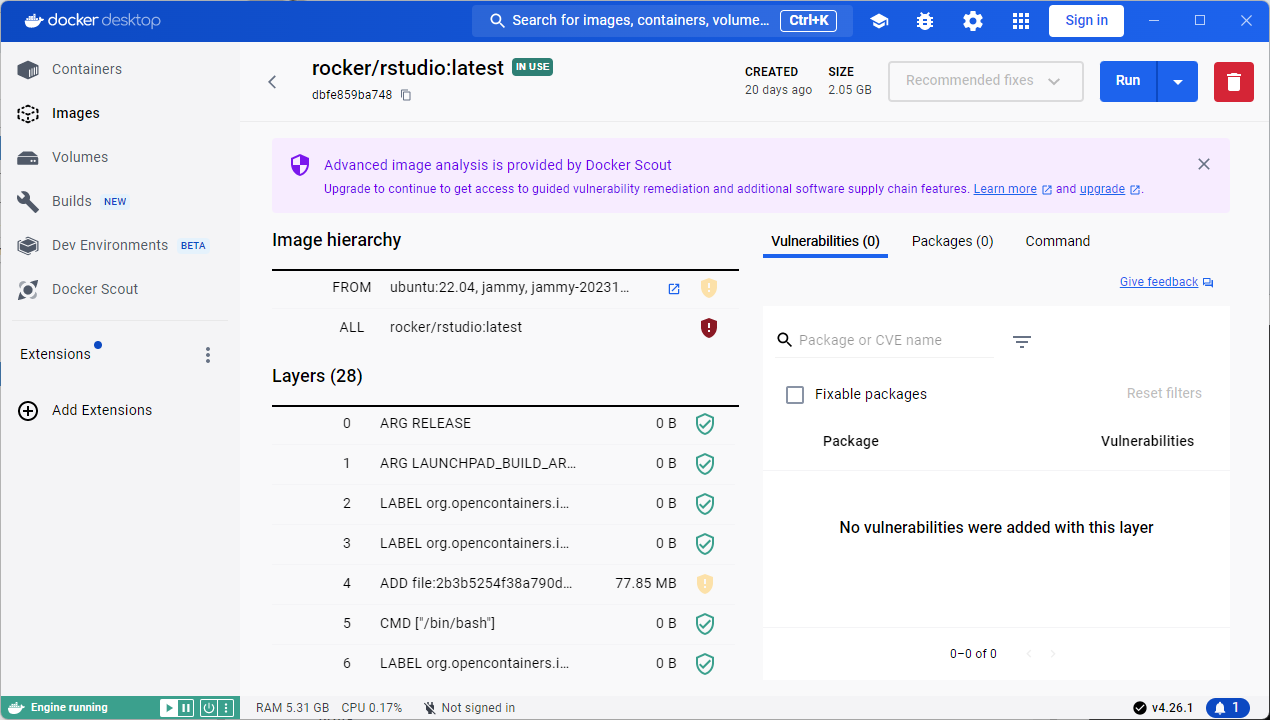

`-` 이미지에서 컨테이너생성 (컨테이너는 인스턴스라고 생각하자..)

**방법1**

```bash
docker run -ti -e PASSWORD='jbnu' -p 8787:8787 rocker/rstudio
```

**방법2**

- GUI

`-` Rstudio 사용

###

`docker ps` : 꺼진건 안나옴

`docker ps -a` : 꺼진것두 나왕..

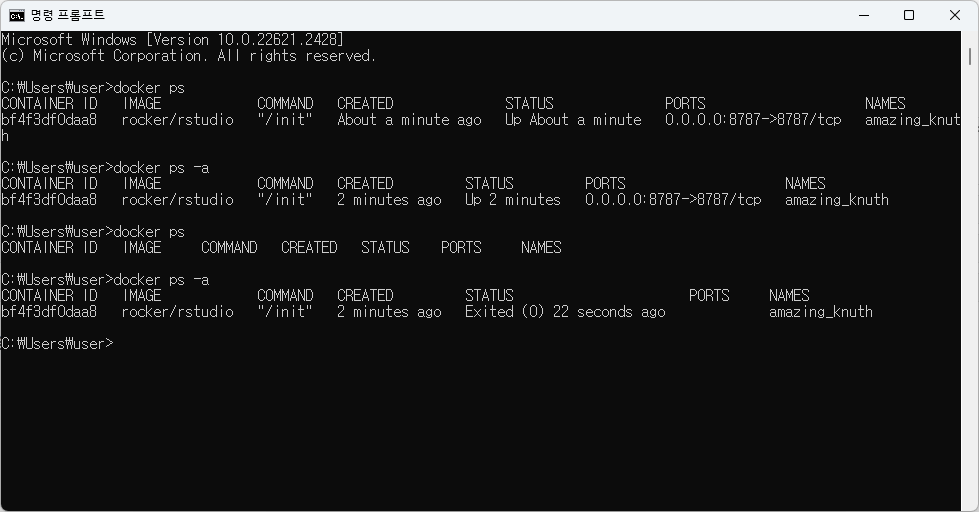

`docker satrt` : exit된거 다시 시작..

`docker stop` : 종료...

`docker rm` : kill(실행중인건 안지워져!)

`docker image rm` : 이미지도 없어져

## 실습65: docker로 ubuntu 실행하기(실습실 컴퓨터)

`-` 우분투 이미지 다운로드 

```bash
docker pull ubuntu
```

`-` 실행 

```bash
docker run -ti -d -t ubuntu /bin/bash
docker exec -ti {컨테이너id 또는 names} bash 
```

`-` vi도 없엉! `apt update`로 뭘 깔자

## 실습65: docker로 ubuntu 실행하기 (183컴퓨터)

`-` 우분투안에서 우분투 실행 

```bash
docker run -ti -d -t -p ?????:????? --name guebin ubuntu /bin/bash
docker exec -ti guebin bash 
```

`-` 아래를 수행 

```bash
passwd root
apt update 
apt install gcc
apt install build-essential
apt install vim 
```

## 실습66: 코드스페이스 사용하기 

`-` 아래를 이용하여 코드스페이스 설치 

```bash
apt-get install curl
curl -Lk 'https://code.visualstudio.com/sha/download?build=stable&os=cli-alpine-x64' --output vscode_cli.tar.gz
tar -xf vscode_cli.tar.gz
```

`-` 아래를 이용하여 초기설정 

```bash
./code tunnel 
```

- 컴퓨터 이름 잘 써야해요... 
- 외워야 하는 이름이에요.. 

나는 coco

`-` 코드스페이스 평생켜놓기 

```bash
nohup ./code tunnel > /dev/null 2>&1 &
```

`-` 코드스페이스의 장점

- 별도의 포트를 먹지 않는다. 
- 하나의 창에서 모든 가상환경을 동시에 이용할 수 있다. <-- 제가 이거때문에 씁니당..
- 보안접속이 가능하다. 

## 실습67: Rstudio 사용하기

`-` 아래를 이용하여 Rstudio를 설치 (base환경인지 r환경인지는 무의미)

```bash
sudo apt-get install gdebi-core
wget https://download2.rstudio.org/server/jammy/amd64/rstudio-server-2022.12.0-353-amd64.deb
sudo gdebi rstudio-server-2022.12.0-353-amd64.deb
```

`-` `grst`가 만든 `rstudio-server-conda`를 클론 

```bash
git clone https://github.com/grst/rstudio-server-conda.git
```

local폴더 들어가서 `strat_rstudio_server.sh`들어가서 아래 내용 수정

`-` 내용을 수정

```{.bash filename= "~/rstudio-server-conda/local/start_rstudio_server.sh"}
...
blalba
...
/usr/lib/rstudio-server/bin/rserver --server-daemonize=0 \
  --www-port=????? \ ### <--- 여기 수정!!!!!(포트번호 작성)
  --auth-minimum-user-id=0 \ ### <--- 여기 추가!!!!!
  --secure-cookie-key-file=$COOKIE_KEY_PATH \
  --server-pid-file="$CWD/rstudio-server.pid" \
  --server-data-dir="$CWD/rstudio-server" \
  --rsession-which-r=$(which R) \
  --rsession-ld-library-path=$CONDA_PREFIX/lib \
  --rsession-path="$CWD/rsession.sh" \
  --server-user $USER \
  --database-config-file "$CWD/database.conf" \
  $REVOCATION_LIST_PAR
```

`-` `start_rstudio_server.sh`를 실행 